# Menyelesaikan Permasalahan Human Resources

# Business Understanding
Latar belakang

Jaya Jaya Maju adalah sebuah perusahaan multinasional yang telah berdiri sejak tahun 2000 dan memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Meskipun perusahaan ini sudah cukup besar, Jaya Jaya Maju masih menghadapi kesulitan dalam mengelola karyawan. Salah satu dampak dari kesulitan ini adalah tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) yang mencapai lebih dari 10%.

# Persiapan

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Tujuan : mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate

# Data Understanding

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("employee_data.csv")
df.shape

(1470, 35)

In [3]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,NaN,NaN,NaN,735.5,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1058.0,NaN,NaN,NaN,0.169187,0.375094,0.0,0.0,0.0,0.0,1.0
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Penjelasan column
EmployeeId : Nomor unik yang mengidentifikasi setiap karyawan.

Age : Usia karyawan.

Attrition : Status apakah karyawan masih bekerja di perusahaan atau tidak. Biasanya 1 menunjukkan karyawan telah meninggalkan perusahaan, dan 0 menunjukkan karyawan masih bekerja.

BusinessTravel : Frekuensi perjalanan bisnis yang dilakukan oleh karyawan. Bisa berupa kategori seperti 'Travel_Rarely', 'Travel_Frequently', atau 'Non-Travel'.

DailyRate : Gaji harian karyawan.

Department : Departemen tempat karyawan bekerja, seperti 'Sales', 'Research & Development', atau 'Human Resources'.

DistanceFromHome : Jarak dari rumah karyawan ke tempat kerja (dalam mil atau kilometer).

Education : Tingkat pendidikan karyawan. Bisa berupa skala numerik yang biasanya mewakili: 1 - 'Below College', 2 - 'College', 3 - 'Bachelor', 4 - 'Master', 5 - 'Doctor'.

EducationField : Bidang pendidikan karyawan, seperti 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', dll.

EmployeeCount : Jumlah total karyawan dalam dataset. Biasanya kolom ini akan memiliki nilai yang sama untuk semua baris (misalnya, 1).

EnvironmentSatisfaction : Tingkat kepuasan karyawan terhadap lingkungan kerja mereka. Bisa berupa skala numerik: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.

Gender : Jenis kelamin karyawan, biasanya 'Male' atau 'Female'.

HourlyRate : Gaji per jam karyawan.

JobInvolvement : Tingkat keterlibatan karyawan dalam pekerjaannya. Bisa berupa skala numerik: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.

JobLevel : Tingkat pekerjaan karyawan dalam organisasi. Biasanya berupa skala numerik.

JobRole : Peran pekerjaan karyawan, seperti 'Sales Executive', 'Research Scientist', 'Laboratory Technician', dll.

JobSatisfaction : Tingkat kepuasan karyawan terhadap pekerjaannya. Skala numerik: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.

MaritalStatus : Status pernikahan karyawan, seperti 'Single', 'Married', atau 'Divorced'.

MonthlyIncome : Gaji bulanan karyawan.

MonthlyRate : Tarif bulanan yang dibayar kepada karyawan.

NumCompaniesWorked : Jumlah perusahaan tempat karyawan pernah bekerja sebelum bergabung dengan perusahaan saat ini.

Over18 : Menunjukkan apakah karyawan berusia lebih dari 18 tahun. Biasanya semua nilai dalam kolom ini adalah 'Y' (Yes).

OverTime : Apakah karyawan bekerja lembur atau tidak. Biasanya 'Yes' atau 'No'.

PercentSalaryHike : Persentase kenaikan gaji karyawan.

PerformanceRating : Penilaian kinerja karyawan. Biasanya berupa skala numerik.

RelationshipSatisfaction : Kepuasan karyawan terhadap hubungan kerja mereka. Skala numerik: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.

StandardHours : Jumlah jam kerja standar. Biasanya kolom ini akan memiliki nilai yang sama untuk semua baris (misalnya, 80).

StockOptionLevel : Tingkat opsi saham yang dimiliki karyawan. Biasanya berupa skala numerik.

TotalWorkingYears : Total tahun pengalaman kerja karyawan.

TrainingTimesLastYear : Jumlah pelatihan yang diikuti karyawan dalam satu tahun terakhir.

WorkLifeBalance : Tingkat keseimbangan kerja dan kehidupan pribadi karyawan. Skala numerik: 1 - 'Bad', 2 - 'Good', 3 - 'Better', 4 - 'Best'.

YearsAtCompany : Jumlah tahun karyawan telah bekerja di perusahaan saat ini.

YearsInCurrentRole : Jumlah tahun karyawan telah bekerja dalam peran saat ini.

YearsSinceLastPromotion : Jumlah tahun sejak karyawan terakhir kali dipromosikan.

YearsWithCurrManager : Jumlah tahun karyawan telah bekerja dengan manajer saat ini.

# Data Preparation / Preprocessing

### Buang Column yang tidak berguna

In [6]:
#Membuang column yang tidak berguna
df = df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours','EmployeeId'])

### Handling missing value Menggunakan imputasi Random Forest


In [7]:
#Liat Missing Values dan Duplikasi Data
print(f'jumlah data duplikasi :{df.duplicated().sum()}')
print("")
print(df.isna().sum())

jumlah data duplikasi :0

Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrM

In [8]:
#encoding Mengonversi data kategorikal (kategori atau label) menjadi nilai numerik
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
df_categorical = df.dtypes[df.dtypes == 'object'].index

for column in df_categorical:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
df_notna = df[df['Attrition'].notna()]
df_isna = df[df['Attrition'].isna()]


X = df_notna.drop(columns=["Attrition"])
y = df_notna["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk menyeimbangkan kelas
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Latih model Random Forest
model = RandomForestClassifier()
model.fit(X_train_res, y_train_res)

# Prediksi nilai 'Attrition' yang hilang
X_missing = df_isna.drop(columns=["Attrition"])
y_pred_missing = model.predict(X_missing)

# Isi nilai 'Attrition' yang hilang dengan prediksi
df.loc[df['Attrition'].isna(), 'Attrition'] = y_pred_missing

# Evaluasi model pada data uji
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)

print(f"Akurasi dengan random forest: {accuracy:.2f}")
print(f"Precision dengan random forest: {precision:.2f}")
print(f"Recall dengan random forest: {recall:.2f}")
print(f"F1_Score dengan random forest: {f1_score_value:.2f}")

# Membuat kolom 'Attrition' menjadi int
df['Attrition'] = df['Attrition'].astype(int)

Akurasi dengan random forest: 0.84
Precision dengan random forest: 0.62
Recall dengan random forest: 0.38
F1_Score dengan random forest: 0.48


In [10]:
#Mengembalikkan data encoding menjadi sebelumnya
for column in df_categorical:
    df[column] = label_encoders[column].inverse_transform(df[column])

### Labelling Categories in Numerical Feature

In [11]:
df["Attrition"] = df["Attrition"].replace({0:"Stay",1:"Leave"})

In [12]:
# 2024 Realtime
def categorize_generation(age):
    if age >= 60 and age <= 78:  
        return '60 - 78 (Baby Boomers)'
    elif age >= 44 and age <= 59:
        return '44 - 59 (Gen X)'
    elif age >= 28 and age <= 43:
        return '28 - 43 (Millennials)'
    elif age >= 12 and age <= 27:
        return '12 - 27 (Gen Z)'

df['Age'] = df['Age'].apply(categorize_generation)

In [13]:
def categorize_daily_rate(df, column_name):
    bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
    labels = [f'{bins[i]} - {(bins[i+1])-1} ($)' for i in range(len(bins)-1)]
    df[column_name] = pd.cut(df[column_name].astype(float), bins=bins, labels=labels, right=False)
    return df
df = categorize_daily_rate(df, 'DailyRate')

In [14]:
def categorize_distance_from_home(df, column_name):
    bins = [0, 5, 10, 15, 20, 25, 30]
    labels = ['0-4 km', '5-9 km', '10-14 km', '15-19 km', '20-24 km', '25-29 km ']
    df['DistanceFromHome'] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)
    return df
df = categorize_distance_from_home(df, 'DistanceFromHome')

In [15]:
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

In [16]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [17]:
def categorize_hourly_rate(df, column_name):
    bins = [30, 40, 50, 60, 70, 80, 90, 101]
    labels = [f'{bins[i]} - {(bins[i+1])-1} ($)' for i in range(len(bins)-1)]
    df[column_name] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)   
    return df
df = categorize_hourly_rate(df, 'HourlyRate')

In [18]:
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [19]:
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})

In [20]:
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [21]:
def categorize_Monthly_Income(df, column_name):
    bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
    labels = [f'{bins[i]} - {(bins[i+1])-1} ($)' for i in range(len(bins)-1)]
    df[column_name] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)   
    return df
df = categorize_Monthly_Income(df, 'MonthlyIncome')

In [22]:
def categorize_Monthly_Rate(df, column_name):
    bins = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000]
    labels = [f'{bins[i]} - {(bins[i+1])-1} ($)' for i in range(len(bins)-1)]
    df[column_name] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)   
    return df
df = categorize_Monthly_Rate(df, 'MonthlyRate')

In [23]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(str) + '%'

In [24]:
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

In [25]:
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [26]:
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [27]:
def CompaniesWorked(years):
    if years < 2:
        return '0-1'
    elif 2 <= years <= 5:
        return '2-3'
    elif 6 <= years <= 10:
        return '4-5'
    else:
        return '5+'
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].apply(CompaniesWorked)

In [28]:
df['StockOptionLevel'] = df['StockOptionLevel'].astype(str) + '%'

In [29]:
def TotalWorkingYears(years):
    if years < 5:
        return '0-5 years'
    elif 6 <= years <= 10:
        return '6-10 years'
    elif 10 <= years <= 20:
        return '10-20 years'
    else:
        return '20+ years'
df['TotalWorkingYears'] = df['TotalWorkingYears'].apply(TotalWorkingYears)

In [30]:
def categorize_years(years):
    if years < 2:
        return '0-1 years'
    elif 2 <= years <= 5:
        return '2-5 years'
    elif 6 <= years <= 10:
        return '6-10 years'
    else:
        return '10++'

df['YearsAtCompany'] = df['YearsAtCompany'].apply(categorize_years)
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].apply(categorize_years)
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].apply(categorize_years)
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].apply(categorize_years)


# EXPLORATORY DATA ANALYSIS

### EMPLOYEE ATTRITION RATE

In [31]:
df_stay = df[df["Attrition"]== "Stay"]
df_leave = df[df["Attrition"]== "Leave"]

stay = df_stay.shape[0] / df.shape[0]
leave = df_leave.shape[0] / df.shape[0]

print("===============Rate=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100:.2f}%")


===============Rate=================
Staying Rate: 84.90%
Leaving Rate: 15.10%


In [32]:
#Attrition Rate
Attrition_0 = df[df["Attrition"] == "Leave"]
Attrition_0 = Attrition_0.drop(columns = "Attrition")

for column in Attrition_0.columns:
    print(f"Employee Attrition Rate by {column}")
    percentages = (Attrition_0[column].value_counts(normalize=True) * 100).round(2)
    percentages = percentages.sort_values(ascending=False) 
    percentages = percentages.astype(str) + '%'
    print(percentages)
    print("====================================================================================")
    print(" ")


Employee Attrition Rate by Age
Age
28 - 43 (Millennials)    56.31%
12 - 27 (Gen Z)          28.38%
44 - 59 (Gen X)          15.32%
Name: proportion, dtype: object
 
Employee Attrition Rate by BusinessTravel
BusinessTravel
Travel_Rarely        63.51%
Travel_Frequently    28.83%
Non-Travel            7.66%
Name: proportion, dtype: object
 
Employee Attrition Rate by DailyRate
DailyRate
300 - 399 ($)      10.36%
500 - 599 ($)       9.91%
200 - 299 ($)       8.56%
600 - 699 ($)       8.56%
400 - 499 ($)       8.11%
1300 - 1399 ($)     8.11%
800 - 899 ($)       7.21%
1400 - 1499 ($)     6.76%
100 - 199 ($)       6.31%
900 - 999 ($)       6.31%
1000 - 1099 ($)     6.31%
1100 - 1199 ($)     5.86%
700 - 799 ($)       4.05%
1200 - 1299 ($)      3.6%
Name: proportion, dtype: object
 
Employee Attrition Rate by Department
Department
Research & Development    59.46%
Sales                     35.59%
Human Resources            4.95%
Name: proportion, dtype: object
 
Employee Attrition Rate by Distan

In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Data Modeling

In [34]:
# Identifikasi kolom-kolom yang bertipe 'object' atau 'category'
df_categorical = df.select_dtypes(include=['object', 'category']).columns

# Inisialisasi dictionary untuk menyimpan LabelEncoders
label_encoders = {}

# Melakukan encoding pada setiap kolom kategori
for column in df_categorical:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [35]:
attrition_1 = df[df['Attrition'] == 1]

In [36]:
# Memisahkan fitur dan target
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Predict probabilities
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print("Random Forest:")
print(f"Accuracy: {rf_accuracy}")
print(f"ROC AUC: {rf_auc}\n")
print(f"Classification Report:\n{rf_report}")
print(f"Feature Importances:\n{rf_feature_importances}\n")



Random Forest:
Accuracy: 0.8707482993197279
ROC AUC: 0.7819181743421053

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.30        38
           1       0.89      0.97      0.93       256

    accuracy                           0.87       294
   macro avg       0.70      0.59      0.61       294
weighted avg       0.84      0.87      0.85       294

Feature Importances:
DailyRate                   0.051483
PercentSalaryHike           0.051245
MonthlyRate                 0.050839
TotalWorkingYears           0.048428
MonthlyIncome               0.044700
OverTime                    0.044138
HourlyRate                  0.041249
StockOptionLevel            0.040226
JobRole                     0.040188
EnvironmentSatisfaction     0.039736
JobSatisfaction             0.039462
JobLevel                    0.038488
WorkLifeBalance             0.035996
MaritalStatus               0.035776
TrainingTimesLastYear       0.035304
Y

In [38]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_feature_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# Predict probabilities
xgb_probs = xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

print("XGBoost:")
print(f"Accuracy: {xgb_accuracy}")
print(f"ROC AUC: {xgb_auc}\n")
print(f"Classification Report:\n{xgb_report}")
print(f"Feature Importances:\n{xgb_feature_importances}\n")


XGBoost:
Accuracy: 0.8741496598639455
ROC AUC: 0.7571957236842105

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.34      0.41        38
           1       0.91      0.95      0.93       256

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.86      0.87      0.86       294

Feature Importances:
StockOptionLevel            0.070501
OverTime                    0.070090
JobLevel                    0.068865
YearsAtCompany              0.061520
TotalWorkingYears           0.060734
EnvironmentSatisfaction     0.041790
Age                         0.038606
JobSatisfaction             0.037037
NumCompaniesWorked          0.035516
Department                  0.035367
RelationshipSatisfaction    0.034046
YearsWithCurrManager        0.032943
JobInvolvement              0.031056
Gender                      0.029001
MonthlyIncome               0.028645
Percent

In [39]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_coefficients = pd.Series(lr.coef_[0], index=X.columns).sort_values(ascending=False)

# Predict probabilities
lr_probs = lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy}")
print(f"ROC AUC: {lr_auc}\n")
print(f"Classification Report:\n{lr_report}")
print(f"Coefficients:\n{lr_coefficients}\n")


Logistic Regression:
Accuracy: 0.8775510204081632
ROC AUC: 0.7798108552631579

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.34      0.42        38
           1       0.91      0.96      0.93       256

    accuracy                           0.88       294
   macro avg       0.72      0.65      0.68       294
weighted avg       0.86      0.88      0.87       294

Coefficients:
JobLevel                    0.527471
StockOptionLevel            0.431567
Age                         0.419270
BusinessTravel              0.255209
JobSatisfaction             0.244316
EnvironmentSatisfaction     0.172341
YearsInCurrentRole          0.145620
YearsAtCompany              0.142148
WorkLifeBalance             0.141963
YearsWithCurrManager        0.116818
TrainingTimesLastYear       0.089968
JobRole                     0.069803
Education                   0.069561
RelationshipSatisfaction    0.064096
MonthlyIncome               0.048880
Mo

# Evaluation

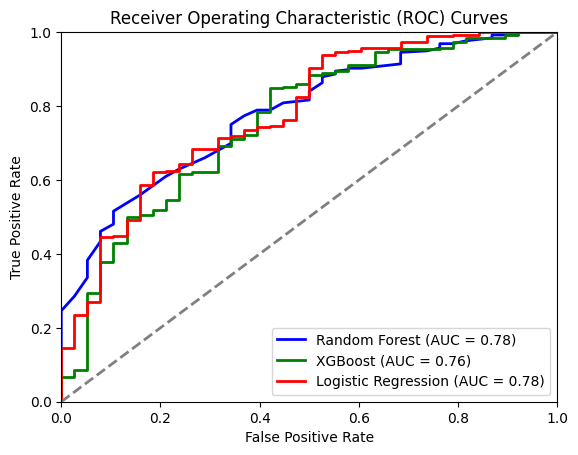

In [40]:
# Plot ROC curves
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_auc)
plt.plot(lr_fpr, lr_tpr, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()